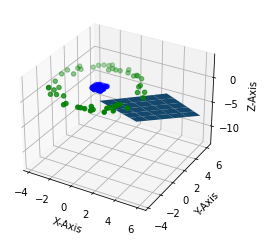

In [13]:
from mpl_toolkits import mplot3d
import numpy as np
from matplotlib import pyplot as plt
import random
import math
import copy

def generateTargetOneX(n):
    xList = []
    rList = np.random.uniform(3.0, 4, n)
    for r in rList:
        theta = np.random.uniform(0.0,1) * 2 * math.pi
        x1 = r * np.cos(theta)
        x2 = r * np.sin(theta)
        xList.append([x1, x2])
    return xList

fig = plt.figure()
ax = plt.axes(projection='3d')

t=[]
for i in range(0,100):
    t.insert(i, 0)


#Creating expected output
for i in range(0,100):
    if i<= 49:
        t[i] = 0.
    else:
        t[i] = 1.

#  input x
x1 = np.random.uniform(-.5,.5,size=(2,50))

# x1, x2 between two circles with radius 3 and 4, x3 = 1
x2 = np.random.uniform(3,6,size=(2,50))
for i in range(0,50):
    r = np.random.uniform(3.0, 4)
    theta = np.random.uniform(0.0,1) * 2 * math.pi
    x2[0,i] = r * np.cos(theta)
    x2[1,i] = r * np.sin(theta)

ax.scatter3D(x1[0],x1[1],1, c='b')
ax.scatter3D(x2[0],x2[1],1, c='g')


ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
# ax.set_title("Training a 3 layer neural network")


# Generating random weights 
w1 = random.uniform(-2.0,2)
w2 = random.uniform(-2.0,2)
w3 = random.uniform(-2.0,2)
# bias 
w4 = random.uniform(-2.0,2)

#Learning rate
lr = 0.08

output = []

count = 1
x = np.linspace(0,6,num= 6)
y = np.linspace(0,6,num= 6)
X,Y = np.meshgrid (x,y)
Z = -(w1*X + w2*Y + w4)/w3
surf = ax.plot_surface(X, Y, Z)

plt.show()


Total training steps:  9999
Target = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Actual Output y = [0.29577046064801676, 0.28475631579619065, 0.28955528164363376, 0.2790451227240806, 0.2757325070034033, 0.2849927230654936, 0.28211378998534087, 0.2813890876844169, 0.27553468223333016, 0.27069681735381906, 0.27536912416459125, 0.2649678975066768, 0.26545137025424703, 0.27017199369397016, 0.2673273723184353, 0.2615815543794872, 0.2580917649510632, 0.25426091366428377, 0.26060701444266915, 0.2614012479989051, 0.2535365361211912, 0.2506715998

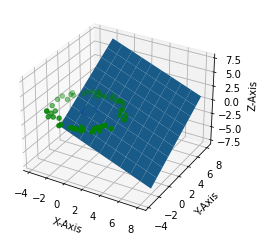

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x1[0],x1[1],1, c='b')
ax.scatter3D(x2[0],x2[1],1, c='g')

ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")

x = np.linspace(-2,8,num= 10)
y = np.linspace(-2,8,num= 10)
X,Y = np.meshgrid (x,y)
Z = -(w1*X + w2*Y + w4)/w3
#surf = ax.plot_surface(X, Y, Z)
xinput = np.random.uniform(0,2.5,size=(3,100))
for i in range(0,50):
    xinput[0,i]=x1[0,i]
    xinput[1,i]=x1[1,i]
    xinput[2,i]=1
for i in range(0,50):
    xinput[0,i+50]=x2[0,i]
    xinput[1,i+50]=x2[1,i]
    xinput[2,i+50]=1


output = []

while (count<10000):
    output = []
    for i in range(0,100):
        
        #  weighted sum
        u = (xinput[0,i]*w1)**2 + (xinput[1,i]*w2)**2 + (xinput[2,i]*w3)**2 + w4
        
        y = 1.0/( 1 + np.exp(-u))

        #  changes in w's
        dw1 = lr*(2*xinput[0,i]*(t[i]-y))*(y*(1-y))
        dw2 = lr*(2*xinput[1,i]*(t[i]-y))*(y*(1-y))
        dw3 = lr*(2*xinput[2,i]*(t[i]-y))*(y*(1-y))
        dw4 = lr*(t[i]-y)*(y*(1-y))
        
        w1 = w1 + dw1
        w2 = w2 + dw2
        w3 = w3 + dw3
        w4 = w4 + dw4

        output.insert(i,y)
       
        
    x = np.linspace(-2,8,num= 10)
    y = np.linspace(-2,8,num= 10)
    X,Y = np.meshgrid (x,y)
    
    Z = -(w1*X + w2*Y + w4)/w3
    # surf = ax.plot_surface(X, Y, Z)
    count = count + 1
    
surf = ax.plot_surface(X, Y, Z)

print("Total training steps: ", count-1)
print ("Target =", t)
print ("Actual Output y =", output)
plt.show()
